In [3]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import norm


from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [3]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

<h1> Deciosion Tree </h1>

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
         author: daodeiv (David Stankov) 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" ></a>
    </p>      
</h2>   

  <h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#bayes_theorem'>Bayes Theorem</a> </li> <br>
      <li><a href='#works'>How does Binomial Naive Bayes work?</a> </li><br>
      <li><a href='#likeli-invest'>Investigation of likelihood and posterior probability  throw features values of Titanic dataset</a> </li><br>  
      <li><a href='#testing'> Implementation of likelihood table for Gaussian Naive Bayes and testing on Titanic </a> </li><br>
       <li><a href='#bernuli'> Bernoulli Naive Bayes</a> </li><br> 
       <li><a href='#ref'>References</a> </li><br>  
    </ul>    
</font>
 </h6>   


In [7]:
df = pd.read_csv("../resources/500_Person_Gender_Height_Weight_Index.csv")  
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [8]:
df['obese'] = (df['Index']>4).astype(int)
df.drop('Index',axis=1,inplace=True)

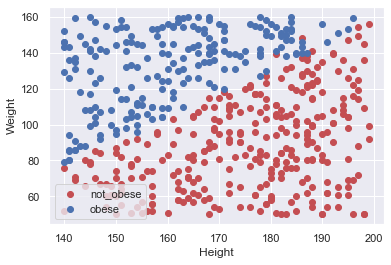

For solving this attribute selection problem, researchers worked and devised some solutions. They suggested using some criteria like :

*Entropy, <br>
*Information gain, <br>
*Gini index, <br>
*Gain Ratio, <br>
*Reduction in Variance <br>
*Chi-Square <br>

<h2 id='entropy'> Entropy (Entropy as expected surprise) </h2>

The entropy was appeared in the thermodynamic field in the works of  Rudolf Clausius over the temperature of the gas. In ML the entropy plays an important row because it is a measure of chaos, disorder, or uncertainty of the system.
The above graphics represent the two gasses initially they have a low entropy because they are cleanly separable, after some time, however, the gasses intermingle and the system's entropy increased. The entropy of a dataset is used to measure the impurity of a dataset and we will use this kind of informativeness measure in our calculations.
<br> <br>


First : If the probability of occurring of event A is $100%$  then your surprise $S$ should be zero.<br>
if $P(A)=1%$ then $S(A)=0$ <br>
Second : If something happens that you were totally sure was impossible, with 100% credence, then you should be infinitely surprised <br>


That is, if E happens and $P(E) = 0$,then  $S = ∞$ <br> <br>

$$S(0) = ∞ $$ <br>

If an event $A_1$ happens that is surprising to degree $S_1$, and then another event $A_2$ happens with surprisingness $S_2$, then your surprise at the combination of these events should be $S1 + S2$.

I.e., we want surprise to be additive. If $$(P(A_1)) = S_1$$ and $$S(P(A_2 | A_1)) = S_2$$,


then $$S(P(A_1 and A_2) = S_1 + S_2$$.

This entails a new constraint on our surprise function, namely:

$$S(PQ) = S(P) + S(Q)$$

Fourth, and finally! We want our surprise function to be continuous – free from discontinuous jumps. If your credence that the event will happen changes by an arbitrarily small amount, then your surprise if it does happen should also change by an arbitrarily small amount.

$$S(P)\; is\; continuous$$.

Taking the simplest choice of k, we end up with a unique formalization of the intuitive notion of surprise:

$$S(P) = – logP$$

To summarize what we have so far: Four basic desideratum for our formalization of the intuitive notion of surprise have led us to a single simple equation.

This equation that we’ve arrived at turns out to be extremely important in information theory. It is, in fact, just the definition of the amount of information you gain by observing E. This reveals to us a deep connection between surprise and information. They are in an important sense expressing the same basic idea: more surprising events give you more information, and unsurprising events give you little information.

Let’s get a little better numerical sense of this formalization of surprise/information. What does a single unit of surprise or information mean? With some quick calculation, we see that a single unit of surprise, or bit of information corresponds to the observation of an event that you had a 50% expectation of. This also corresponds to a ruling out of 50% of the weight of possible other events you thought you might have observed. In essence, each bit of information you receive / surprise you experience corresponds to the total amount of possibilities being cut in half.

Two bits of information narrow the possibilities to one-fourth. Three cut out all but one-eighth. And so on. For a rational agent, the process of receiving more information or of being continuously surprised is the process of whittling down your models of reality to a smaller and better set!

The next great step forward is to use our formalization of surprise to talk not just about how surprised you are once an event happens, but how surprised you expect to be. If you have a credence of P in an event happening, then you expect a degree of surprise S(P) with credence P. In other words, the expected surprise you have with respect to that particular event is:

$$Expected\;\;surprise = – p\log p$$

The next great step forward is to use our formalization of surprise to talk not just about how surprised you are once an event happens, but how surprised you expect to be. If you have a credence of P in an event happening, then you expect a degree of surprise S(P) with credence P. In other words, the expected surprise you have with respect to that particular event is:



When summed over the totality of all possible events that occurred we get the following expression:

$Total\;expected \;surprise = – ∑_i P_i \log P_i$

This expression should look very very familiar to you. It’s one of the most important quantities humans have discovered…

$$Entropy = Total\; expected\; surprise$$

Total expected surprise is entropy. And entropy is a measure of uncertainty.

source: https://risingentropy.com/entropy-is-total-expected-surprise/#:~:text=Total%20expected%20surprise%20is%20entropy,happen%20in%20the%20next%20moment

$$ E(S) = \sum_{i=1}^c - p_i\log_2p_i$$

In [11]:
def entropy(y):
    """
    Given a Pandas Series, it calculates the Entropy
    y: variable with wich calculate Entropy
    """
    if isinstance(y, pd.Series):
        p = y.value_counts()/y.shape[0]
        entropy = np.sum(-p*np.log2(p)+1e-9)
        return(entropy)
    else :
        raise("Object y must to be a Pandas Series")

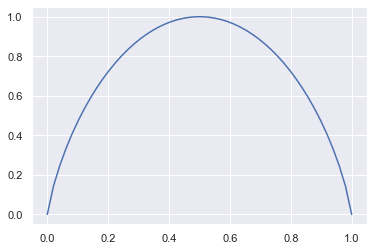

In [47]:
A = np.array([p,1-p])
D = np.nan_to_num(np.log2(A)*A)
C = -np.sum(D,axis=0)
plt.plot(p,C)

From the above graph, it is quite evident that the entropy H(X) is zero when the probability is either 0 or 1. The Entropy is maximum when the probability is 0.5 because it projects perfect randomness in the data and there is no chance if perfectly determining the outcome.

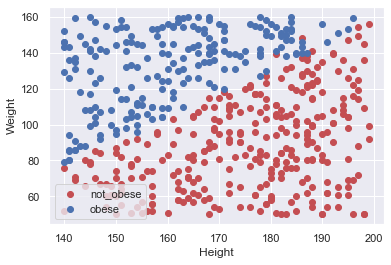

In [14]:
is_ob = df[df['obese']==0].drop('obese',axis=1)
ob = df[df['obese']==1].drop('obese',axis=1)
plt.scatter(is_ob['Height'],is_ob['Weight'],color='r',label='not_obese')
plt.scatter(ob['Height'],ob['Weight'],color='b',label='obese')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

In [12]:
weights = df['Weight'].unique()
data = np.array([0,0,0])
for i in range(1,len(weights)):
    weight = weights[i]
    a = df[df['Weight']<weight]
    b = df[df['Weight']>weight]
    e = entropy(a['obese'])
    e_1 = entropy(b['obese'])
    data = np.vstack([data,[weight,e,e_1]])

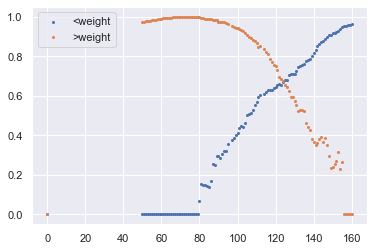

In [13]:
plt.scatter(data[:,0],data[:,1],s=4,label='<weight')
plt.scatter(data[:,0],data[:,2],s=4,label='>weight')
plt.legend()

<h2> What Is Information Gain? </h2>

Information gain is the expected reduction in entropy caused by partitioning the examples according to a given attribute.
Information Gain, or IG for short, measures the reduction in entropy or surprise by splitting a dataset according to a given value of a random variable.

As we have seen, cuts are compared by impurity. Therefore, we are interested in comparing those cuts that generate less impurity. For this, Information Gain is used. This metric indicates the improvement when making different partitions and is usually used with entropy (it could also be used with the Gini index, although in that case it would not be called Informaiton Gain).

The calculation of the Information Gain will depend on whether it is a classification or regression decision tree. There would be two options:

$$ InformationGain_{clasification} = E(d) - \sum\frac{|s|}{|d|}E(s)$$

$$ InformationGain_{regression} = Var(d) - \sum\frac{|s|}{|d|}Var(s)$$

In [ ]:
So the Information Gain will look like this:

In [16]:
a = mask = df['Gender'] == 'Male'
a

0       True
1       True
2      False
3      False
4       True
       ...  
495    False
496    False
497    False
498     True
499     True
Name: Gender, Length: 500, dtype: bool

In [25]:
b = mask.shape[0] - a
data=df

In [20]:
def variance(y):
  '''
  Function to help calculate the variance avoiding nan.
  y: variable to calculate variance to. It should be a Pandas Series.
  '''
  if(len(y) == 1):
    return 0
  else:
    return y.var()

def information_gain(y, mask, func=entropy):
  '''
  It returns the Information Gain of a variable given a loss function.
  y: target variable.
  mask: split choice.
  func: function to be used to calculate Information Gain in case os classification.
  '''
  
  a = sum(mask)
  b = mask.shape[0] - a
  
  if(a == 0 or b ==0): 
    ig = 0
  
  else:
    if  False : #y.dtypes != 'O':
      ig = variance(y) - (a/(a+b)* variance(y[mask])) - (b/(a+b)*variance(y[-mask]))
    else:
      ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
  
  return ig

In [22]:
def max_information_gain_split(x, y, func=entropy):
    x,y = data['Weight'], data['obese']

    split_value = []
    ig = [] 

    numeric_variable = True if x.dtypes != 'O' else False # check the type of column

    #Create options according to variable type
    if numeric_variable:
        options = x.sort_values().unique()[1:]
    else : 
        pass
    
    for val in options:
        #print(x)
        mask =   x < val if numeric_variable else x.isin(val)
        val_ig = information_gain(y, mask, func=entropy)
        print(val_ig)
    
        ig.append(val_ig)
        split_value.append(val)
    
        if(len(ig)==0):
            return (None,None,None, False)
    
    else:
    # get results with highest IG
        best_ig = min(ig)
        best_ig_index = ig.index(best_ig)
        best_split_number = split_value[best_ig_index]
    return(best_ig,best_split_number,numeric_variable, True)

In [26]:
weight_ig, weight_slpit, _, _ = max_information_gain_split(df['Weight'], df['obese'])  
weight_slpit

0.013248550362148115
0.019239131552930555
0.02681886589871596
0.02834724100380448
0.040727347611283715
0.04229436503052997
0.04860686705112138
0.05659943049355809
0.06307713714734342
0.06798539307789397
0.07626334282670666
0.08806366952975142
0.09838184391520022
0.1001203601070142
0.10536887177872045
0.11422844681134792
0.11961307228444751
0.12870562941028996
0.13608897412820398
0.1416920224069167
0.15691798029007065
0.16469180212225099
0.16862030952168472
0.1725771002708847
0.18057724748327653
0.18665484721886905
0.19486458743553137
0.1990160809393725
0.20530299755540815
0.20102413256055462
0.19526376749957441
0.2081612343224879
0.21474191596081815
0.2304535336513499
0.23966454360723888
0.23969139748109958
0.21763971693220618
0.2291653279241681
0.2193949694101841
0.22638091525802462
0.24314613523855388
0.23614646909849735
0.23911276847072294
0.24157066726027876
0.23593754722217597
0.242100178592647
0.2538090793946203
0.25289134319802076
0.25476624904361433
0.25682893260523576
0.250637

51

In [27]:
print(
  "The best split for Weight is when the variable is less than ",
  weight_slpit,"\nInformation Gain for that split is:", weight_ig
)

The best split for Weight is when the variable is less than  51 
Information Gain for that split is: 0.013248550362148115


In [28]:
entropy(data['obese'][data['Weight']<51])

1e-09

<h2 id='ref'> References </h2>



*<a href='https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052'>Decision Trees in Machine Learning</a> <br>

*<a href='https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html'>Decision Tree Algorithm, Explained</a>

*<a href='https://risingentropy.com/entropy-is-total-expected-surprise/#:~:text=Total%20expected%20surprise%20is%20entropy,happen%20in%20the%20next%20moment'> Supricsd </a>